# Has Path

Say we have an array which is a collection of edges:

In [1]:
edges = [
    ['i','j'],
    ['k','i'],
    ['m','k'],
    ['k','l'],
    ['o','n']
]

We know that this is an undirected graph so if we can travel from one node to another, we can also travel from the other to the one.<br>In modal logic terms, relations between nodes are **reflexive**.

Would look like this: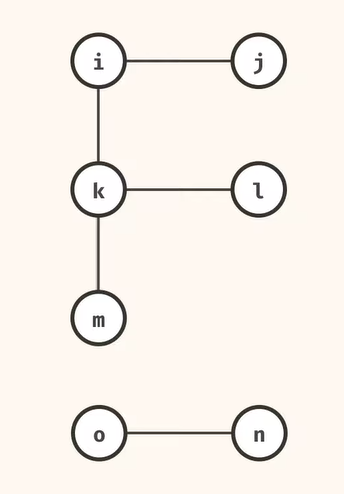

We want to convert the edge list into an adjacency list.<br>Typically our algorithms will work better with adjacency lists.

Pseudo-code for this:<br>iterate through the arrays in the array.<br>Create an empty edge for each unseen node.<br> And populate the edges **and** the inverse, because the graph is undirected.

Common case, particularly with **undirected** graphs, dealing with a cycle.<br>Adds another connection k--j to make this explicit:
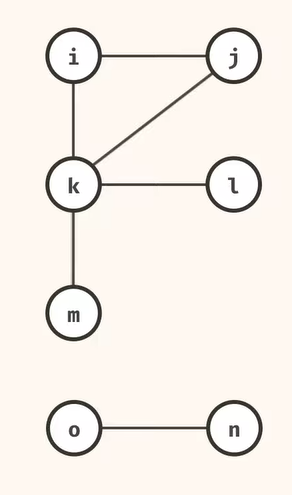

Has a cycle i-k-j.<br>But also has a cycle anywhere; o--n is a trivial cycle back and forth between the two.<br>Pseudo-code is to check of as visited when arriving at each node.

Question: is there a path between i and l?

Travel i-j-k-i.<br>Checking off that have visited each one.<br>When arrive at i again, notice that have already been there; decide not to travel there again: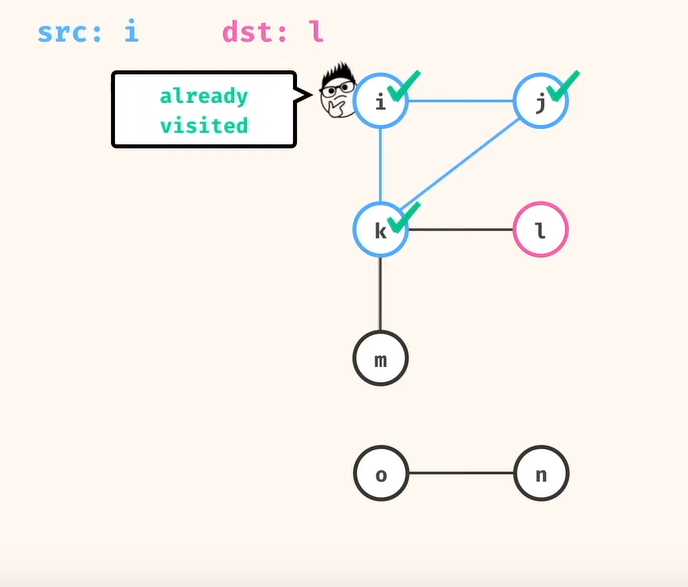
Thereby, avoide the infinite loop.<br>Then, go to l and mark as visited.<br>And also notice that l is the desination node, and return True.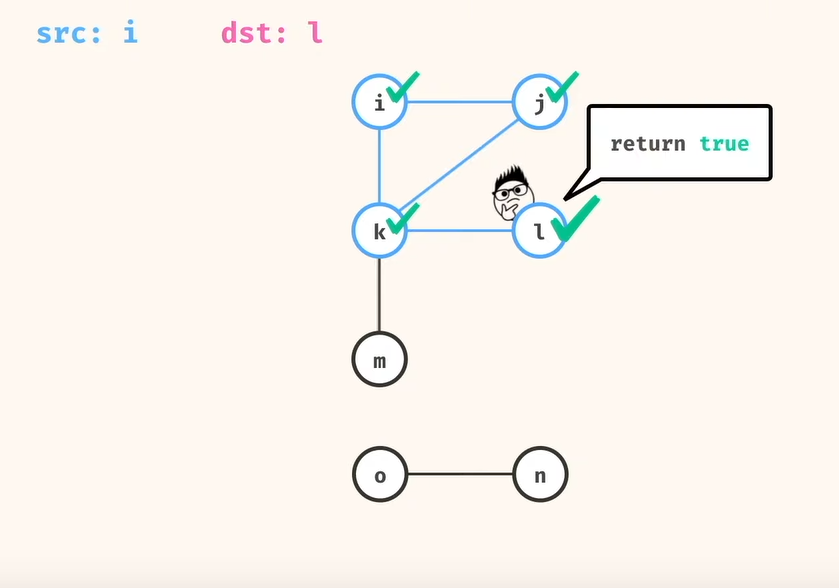

Should always guard against infinite loops with checks of having visited, if not given any assumptions.

Example where can't get from one to the other.<br>(Can already verify this visually)<br> 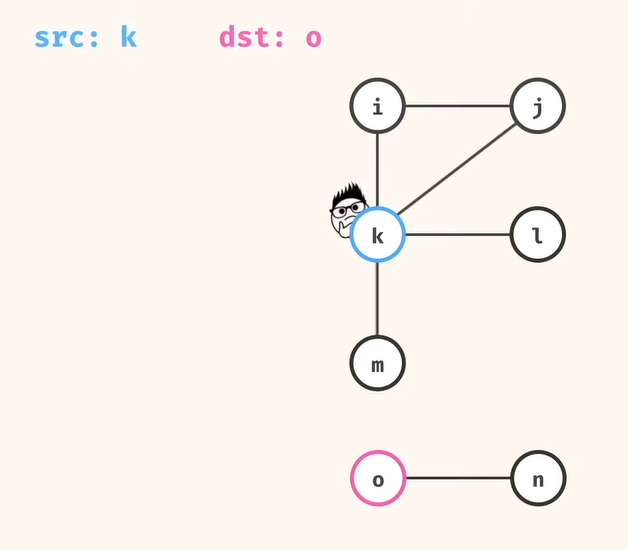<br>To work through:<br>k-i-j-k, from there don't work through any of k's visited neighbours:<br>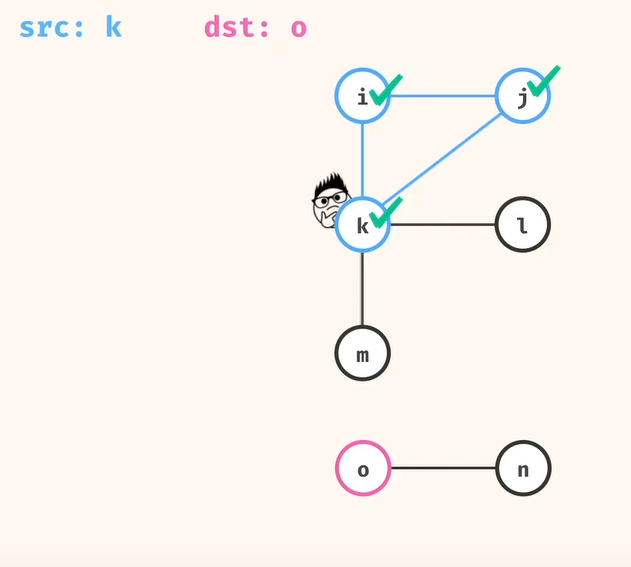<br>so then -l and only one left to visit; -m.<br> None left to visit. Finished the reversal, so return False.<br> 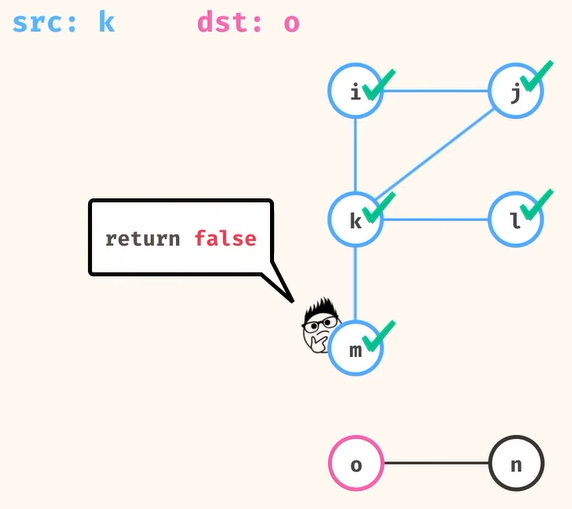

Defining complexity:
Time: $O(e)$<br>
Space $O(n)$

$O()$ means worst case.

## Code to Solve this Problem

In [2]:
def buildgraph(edges, undirected=False):
    graph = {}
    
    # Generate a dictionary with all the nodes
    [graph.update({edge_1:[]}) for edge_1,edge_2 in edges]
    [graph.update({edge_2:[]}) for edge_1,edge_2 in edges]
    
    # Add all the edges
    [graph[edge_1].append(edge_2 )for edge_1,edge_2 in edges]
    # Make the edges reflexive if it is an undirected graph
    if undirected==True:
        [graph[edge_2].append(edge_1)for edge_1,edge_2 in edges]
    return graph

In [3]:
print(edges)
graph = buildgraph(edges,
                   undirected=True)
print(graph)
#no longer in alphabetical order, but doesn't really matter

[['i', 'j'], ['k', 'i'], ['m', 'k'], ['k', 'l'], ['o', 'n']]
{'i': ['j', 'k'], 'k': ['i', 'l', 'm'], 'm': ['k'], 'o': ['n'], 'j': ['i'], 'l': ['k'], 'n': ['o']}


Recursive depth first traversal solution to has path for a cyclical graph:

In [7]:
def recursive_cyclical_has_path(graph, source, destination,visited_set):
    if source == destination:
        return True
    neighbours=graph[source]
    visited_set.add(source)
    if True in [recursive_cyclical_has_path(graph,neighbour,destination,visited_set=visited_set) for neighbour in neighbours if neighbour not in visited_set]:
        return True
    return False

**Putting the two functions together**

In [8]:
def undirected_edges_to_path(edges,source,destination):
    graph = buildgraph(edges,undirected=True)
    visited=set()
    return recursive_cyclical_has_path(graph=graph,
                                       source=source,
                                       destination=destination,
                                       visited_set=visited)

In [10]:
print(undirected_edges_to_path(edges=edges,source='i',destination='m'))
undirected_edges_to_path(edges=edges,source='i',destination='n')

True


False